<a href="https://colab.research.google.com/github/HansBAKAM/Pizza_Sales/blob/main/Analyse_et_pr%C3%A9diction_des_ventes_pizza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/pizza_sales.csv')
df

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,new_order_date
0,1,1,hawaiian_m,1,01-01-2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,NaN
1,2,2,classic_dlx_m,1,01-01-2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,NaN
2,3,2,five_cheese_l,1,01-01-2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,NaN
3,4,2,ital_supr_l,1,01-01-2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,NaN
4,5,2,mexicana_m,1,01-01-2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,31-12-2015,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza,NaN
48616,48617,21348,four_cheese_l,1,31-12-2015,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza,NaN
48617,48618,21348,napolitana_s,1,31-12-2015,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza,NaN
48618,48619,21349,mexicana_l,1,31-12-2015,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,NaN


In [ ]:
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,new_order_date
0,1,1,hawaiian_m,1,01-01-2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,NaN
1,2,2,classic_dlx_m,1,01-01-2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,NaN
2,3,2,five_cheese_l,1,01-01-2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,NaN
3,4,2,ital_supr_l,1,01-01-2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,NaN
4,5,2,mexicana_m,1,01-01-2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,NaN


In [ ]:
# Revenu total
sum(df['total_price'])

817860.049999993

In [ ]:
# Revenu moyen par commande
df['order_id'].describe()

count    48620.000000
mean     10701.479761
std       6180.119770
min          1.000000
25%       5337.000000
50%      10682.500000
75%      16100.000000
max      21350.000000
Name: order_id, dtype: float64

In [ ]:
sum(df['total_price'])/max(df['order_id'])

38.307262295081635

In [ ]:
# Nombre total de pizza vendues
sum(df['quantity'])

49574

In [ ]:
# Nombre de pizza moyenne par commande
sum(df['quantity'])/max(df['order_id'])

2.321967213114754

day_of_week
Friday       3538
Monday       2794
Saturday     3158
Sunday       2624
Thursday     3239
Tuesday      2973
Wednesday    3024
Name: order_id, dtype: int64


<Axes: xlabel='day_of_week'>

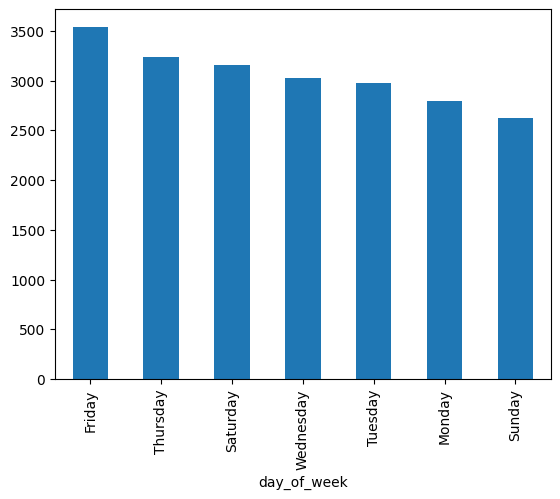

In [ ]:
#Tendances Hebdomadaires du nombre de commandes
df.isna().sum()

#	Transportons les éléments de la colonne order_date qui sont en format ‘texte’ pour qu’ils soient de type ‘date’.
df['new_order_date'] = pd.to_datetime(df['order_date'], format='%d-%m-%Y')
# Créer une colonne 'day_of_week' pour stocker le jour de la semaine
df['day_of_week'] = df['new_order_date'].dt.day_name()

# Regrouper les 'order_id' par jour de la semaine et compter le nombre d'occurrences
print(df.groupby('day_of_week')['order_id'].nunique())
# Visualisation
df.groupby('day_of_week')['order_id'].nunique().sort_values(ascending=False).plot.bar()

day_of_week
1     820
2     712
3     721
4     747
5     625
6     727
7     710
8     719
9     703
10    728
11    731
12    634
13    718
14    715
15    809
16    713
17    717
18    699
19    634
20    728
21    687
22    664
23    716
24    669
25    557
26    666
27    786
28    648
29    587
30    627
31    433
Name: order_id, dtype: int64


<Axes: ylabel='day_of_week'>

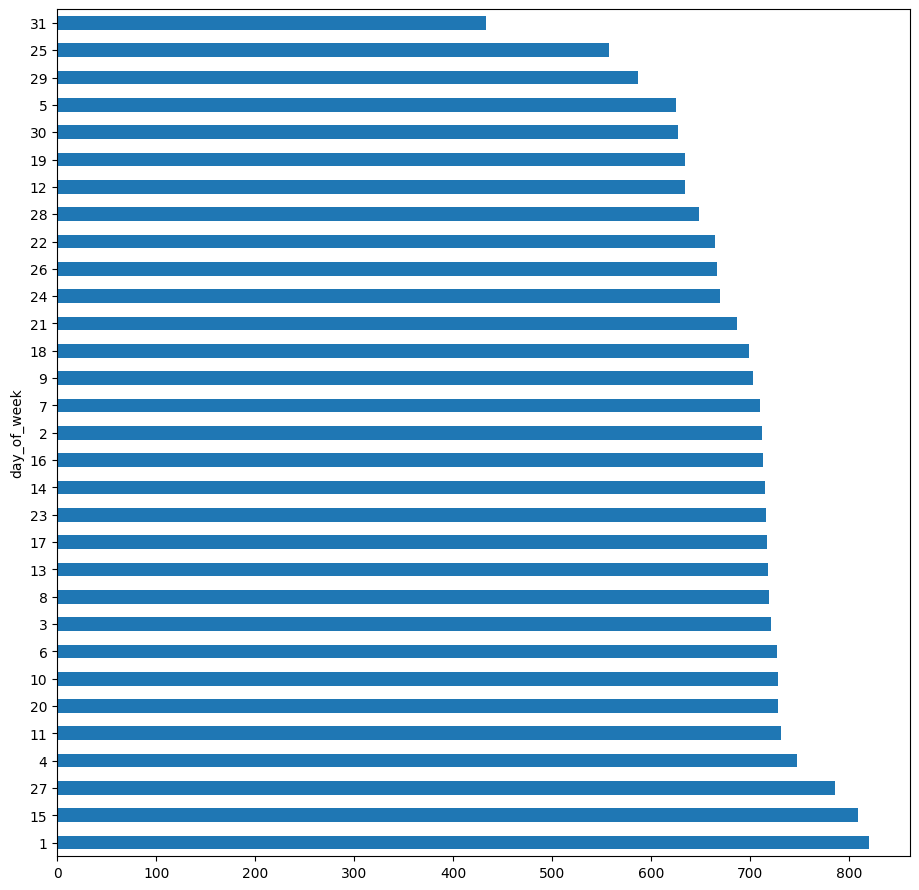

In [ ]:
#Tendances journalières du nombre de commandes

# Créer une colonne 'day_of_week' pour stocker le jour de la semaine
df['day_of_week'] = df['new_order_date'].dt.day

# Regrouper les 'order_id' par jour de la semaine et compter le nombre d'occurrences
print(df.groupby('day_of_week')['order_id'].nunique())
# Visualisation
plt.figure(figsize=(11,11))
df.groupby('day_of_week')['order_id'].nunique().sort_values(ascending=False).plot.barh()


hour_of_day
9        1
10       8
11    1231
12    2520
13    2455
14    1472
15    1468
16    1920
17    2336
18    2399
19    2009
20    1642
21    1198
22     663
23      28
Name: order_id, dtype: int64


<Axes: xlabel='hour_of_day'>

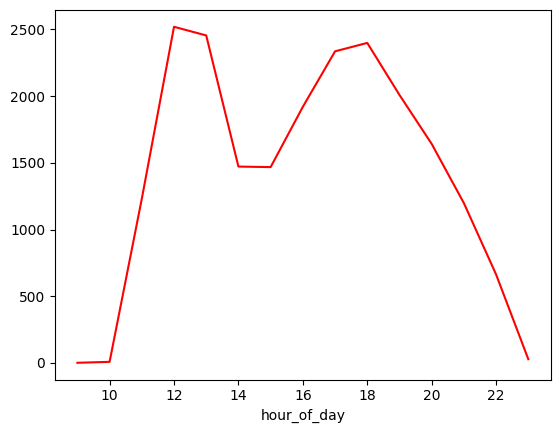

In [ ]:
#	Tendances horaires du nombre de commandes

#	Transportons les éléments de la colonne order_time qui sont en format ‘texte’ pour qu’ils soient de type ‘datetime’.
df['new_order_time'] = pd.to_datetime(df['order_time'], format='%H:%M:%S')
# Créer une colonne 'hour_of_day' pour stocker les heures
df['hour_of_day'] = df['new_order_time'].dt.hour

# Regrouper les 'order_id' par jour de la semaine et compter le nombre d'occurrences
print(df.groupby('hour_of_day')['order_id'].nunique())
# visualisation
df.groupby('hour_of_day')['order_id'].nunique().plot(color='red')

month_of_year
April        1799
August       1841
December     1680
February     1685
January      1845
July         1935
June         1773
March        1840
May          1853
November     1792
October      1646
September    1661
Name: order_id, dtype: int64


<Axes: xlabel='month_of_year'>

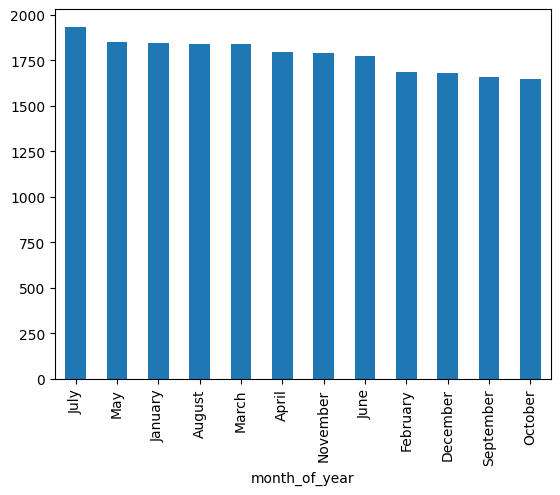

In [ ]:
#Tendances mensuelles du nombre de commandes

# Créer une colonne 'month_of_year' pour stocker le jour de la semaine
df['month_of_year'] = df['new_order_date'].dt.month_name()

# Regrouper les 'order_id' par jour de la semaine et compter le nombre d'occurrences
X=df.groupby('month_of_year')['order_id'].nunique()
print(X)
# Visualisation
X.sort_values(ascending=False).plot.bar()

pizza_category
Chicken    0.239551
Classic    0.269060
Supreme    0.254563
Veggie     0.236826
Name: total_price, dtype: float64


<Axes: ylabel='total_price'>

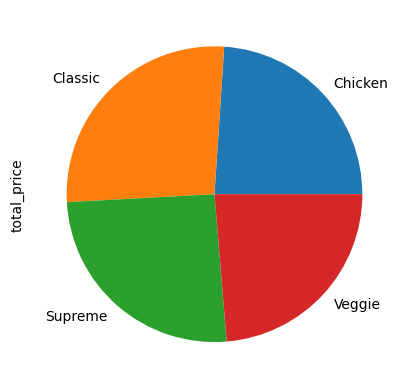

In [ ]:
#	Pourcentage des ventes par catégorie de pizza
df.columns
Y=df.groupby('pizza_category')['total_price'].sum()/sum(df['total_price'])
print(Y)
# Visualisation
Y.plot.pie()

In [ ]:
#	Pourcentage des ventes par catégorie de pizza le mois de janvier

# Filtrer les données pour le mois de janvier
january_data = df[df['month_of_year'] == "January"]
january_data.groupby('pizza_category')['total_price'].sum()/sum(df['total_price'])

pizza_category
Chicken    0.019794
Classic    0.022766
Supreme    0.021923
Veggie     0.020854
Name: total_price, dtype: float64

In [ ]:
df

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,new_order_date,day_of_week,new_order_time,hour_of_day,month_of_year
0,1,1,hawaiian_m,1,01-01-2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,2015-01-01,1,1900-01-01 11:38:36,11,January
1,2,2,classic_dlx_m,1,01-01-2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,2015-01-01,1,1900-01-01 11:57:40,11,January
2,3,2,five_cheese_l,1,01-01-2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,2015-01-01,1,1900-01-01 11:57:40,11,January
3,4,2,ital_supr_l,1,01-01-2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,2015-01-01,1,1900-01-01 11:57:40,11,January
4,5,2,mexicana_m,1,01-01-2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,2015-01-01,1,1900-01-01 11:57:40,11,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,31-12-2015,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza,2015-12-31,31,1900-01-01 21:23:10,21,December
48616,48617,21348,four_cheese_l,1,31-12-2015,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza,2015-12-31,31,1900-01-01 21:23:10,21,December
48617,48618,21348,napolitana_s,1,31-12-2015,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza,2015-12-31,31,1900-01-01 21:23:10,21,December
48618,48619,21349,mexicana_l,1,31-12-2015,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,2015-12-31,31,1900-01-01 22:09:54,22,December


In [ ]:
# 12.	Tendances mensuelles du total des ventes
df.groupby('month_of_year')['total_price'].sum()/sum(df['total_price'])

month_of_year
April        0.084045
August       0.083484
December     0.079110
February     0.079671
January      0.085336
July         0.088717
June         0.083425
March        0.086075
May          0.087304
November     0.086073
October      0.078287
September    0.078473
Name: total_price, dtype: float64

In [ ]:
# 13.	Pourcentage des ventes par taille de pizza
df.groupby('pizza_size')['total_price'].sum()/sum(df['total_price'])

pizza_size
L      0.458903
M      0.304920
S      0.217735
XL     0.017211
XXL    0.001231
Name: total_price, dtype: float64

In [ ]:
# 14.	Total des pizzas vendues par catégorie de pizza
df.groupby('pizza_category')['quantity'].sum()

pizza_category
Chicken    11050
Classic    14888
Supreme    11987
Veggie     11649
Name: quantity, dtype: int64

In [ ]:
# 15.	Top 5 des pizzas les plus vendues en fonction du nombre total de pizzas
df.groupby('pizza_name')['quantity'].sum().sort_values(ascending=False).head()

pizza_name
The Classic Deluxe Pizza      2453
The Barbecue Chicken Pizza    2432
The Hawaiian Pizza            2422
The Pepperoni Pizza           2418
The Thai Chicken Pizza        2371
Name: quantity, dtype: int64

In [ ]:
# 16.	Top 5 des pizzas les moins vendues en fonction du nombre total de pizzas
df.groupby('pizza_name')['quantity'].sum().sort_values(ascending=False).tail()

pizza_name
The Soppressata Pizza        961
The Spinach Supreme Pizza    950
The Calabrese Pizza          937
The Mediterranean Pizza      934
The Brie Carre Pizza         490
Name: quantity, dtype: int64

In [ ]:
# 17.	Top 5 des pizzas les moins vendues en Janvier en fonction du nombre total de pizzas
january_data.groupby('pizza_name')['quantity'].sum().sort_values(ascending=False).tail()

pizza_name
The Spinach Pesto Pizza    77
The Green Garden Pizza     75
The Mediterranean Pizza    68
The Calabrese Pizza        67
The Brie Carre Pizza       35
Name: quantity, dtype: int64

# **Prédiction des ventes**

In [ ]:
df1=df.copy()
df1.columns

Index(['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name', 'new_order_date',
       'day_of_week', 'new_order_time', 'hour_of_day', 'month_of_year'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

# Charger les données
# Assurez-vous que les colonnes nécessaires sont numériques
# Si besoin, encodez les colonnes catégorielles avec LabelEncoder (Rendre les valeurs numériques)
le = LabelEncoder()
df1['pizza_name_encoded'] = le.fit_transform(df['pizza_name'])
df1['pizza_size_encoded'] = le.fit_transform(df['pizza_size'])
df1['pizza_category_encoded'] = le.fit_transform(df['pizza_category'])
df1['month_of_year_encoded'] = le.fit_transform(df['month_of_year'])

# Sélectionner les fonctionnalités pertinentes
features = ['pizza_name_encoded','unit_price', 'pizza_size_encoded', 'hour_of_day', 'pizza_category_encoded', 'day_of_week', 'month_of_year_encoded']

# Définir les variables indépendantes (X) et la variable dépendante (y)
X = df1[features]
y = df1[['quantity','total_price']]

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialiser le modèle de régression linéaire
model = RandomForestRegressor()

# Entraîner le modèle
model.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluer la performance du modèle
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.40828222536431774
Mean Squared Error: 3.9323650082619457
Root Mean Squared Error: 1.9830191648751017


In [ ]:
df1.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,...,pizza_name,new_order_date,day_of_week,new_order_time,hour_of_day,month_of_year,pizza_size_encoded,pizza_category_encoded,month_of_year_encoded,pizza_name_encoded
0,1,1,hawaiian_m,1,01-01-2015,11:38:36,13.25,13.25,M,Classic,...,The Hawaiian Pizza,2015-01-01,1,1900-01-01 11:38:36,11,January,1,1,4,12
1,2,2,classic_dlx_m,1,01-01-2015,11:57:40,16.00,16.00,M,Classic,...,The Classic Deluxe Pizza,2015-01-01,1,1900-01-01 11:57:40,11,January,1,1,4,7
2,3,2,five_cheese_l,1,01-01-2015,11:57:40,18.50,18.50,L,Veggie,...,The Five Cheese Pizza,2015-01-01,1,1900-01-01 11:57:40,11,January,0,3,4,8
3,4,2,ital_supr_l,1,01-01-2015,11:57:40,20.75,20.75,L,Supreme,...,The Italian Supreme Pizza,2015-01-01,1,1900-01-01 11:57:40,11,January,0,2,4,14
4,5,2,mexicana_m,1,01-01-2015,11:57:40,16.00,16.00,M,Veggie,...,The Mexicana Pizza,2015-01-01,1,1900-01-01 11:57:40,11,January,1,3,4,17


In [ ]:
# Nouvelles données à prédire (assurez-vous que les colonnes sont correctement prétraitées)
new_data = pd.DataFrame({
     'pizza_name_encoded': [12],
    'unit_price': [12.48],
    'pizza_size_encoded': [1],
    'hour_of_day': [8],
    'pizza_category_encoded': [1],
    'day_of_week': [1],
    'month_of_year_encoded': [4],
})

# Faire la prédiction
predicted_total_price = model.predict(new_data)

# Afficher la prédiction
print('Prédiction de vente future:', predicted_total_price)


Prédiction de vente future: [[ 1.1  13.78]]
